## Contents
1. [Introduction](http://localhost:8888/notebooks/GA-homework/Final%20Project/4-DraftNotebook.ipynb#Introduction)
2. [Dataset](http://localhost:8888/notebooks/GA-homework/Final%20Project/4-DraftNotebook.ipynb#Dataset)
3. [Exploratory Analysis](http://localhost:8888/notebooks/GA-homework/Final%20Project/4-DraftNotebook.ipynb#Exploratory-Analysis)
4. [Data Cleaning](http://localhost:8888/notebooks/GA-homework/Final%20Project/4-DraftNotebook.ipynb#Data-visualisation)
5. [Creating a Model](http://localhost:8888/notebooks/GA-homework/Final%20Project/4-DraftNotebook.ipynb#Creating-a-model)
6. [Visualize Probability](http://localhost:8888/notebooks/GA-homework/Final%20Project/4-DraftNotebook.ipynb#Visualize-probability-of-different-features)
7. [Visualize Performance](http://localhost:8888/notebooks/GA-homework/Final%20Project/4-DraftNotebook.ipynb#Visualize-performance-against-baseline)
8. [Next Steps](http://localhost:8888/notebooks/GA-homework/Final%20Project/4-DraftNotebook.ipynb#Next-Steps)

## Introduction

Vision Zero is a worldwide initiative that is adopted by cities to get all traffic related deaths down to zero. DC adopted this in 2015 with the goal of achieving Vision Zero by 2024. DC has published data on crashes from 2000 to 2016. The goal of this study is to analyze crashes in DC and predict whether a crash will be fatal or not (predicting a binary value). Similarly, this study will determine the greatest factors in fatal crashes. 

The results of this study can be used to inform appropriate advertising campaigns for Vision Zero. The results can also be used to inform the District on places where traffic calming initiatives should be instated. 

When considering what factors have on whether a crash is fatal or not, I predict that major injuries and the type of crash will have the most impact. 


# Dataset

Crash data from Washington DC is available from opendata.dc.gov. It is available for download in CSV format (along with accessible through an API). It has crashes from 2000 to 2016, has 152,744 rows, and 13 columns that we will use for this study. 

### Data Dictionary

Data Dictionary: 

| ﻿Field                        | Description                                           | Data Type   |
|------------------------------|-------------------------------------------------------|-------------|
| XCOORD                       | X coordinate                                          | Location    |
| YCOORD                       | Y coordinate                                          | Location    |
| INTERSECTIONTYPE             | Type of interesction where the crash occured          | Categorical |
| ISWORKZONERELATED            | Did the crash happen at a work zone (0 = no, 1 = yes) | Categorical |
| FIRSTHARMFULEVENTSPECIFICS   | Specifics of the crash - what the car hit, etc        | Categorical |
| LIGHTCONDITION               | Light condition at time of crash                      | Categorical |
| WEATHER                      | Weather at time of crash                              | Categorical |
| ISDRINKING                   | Did the crash involve  alcohol                        | Categorical |
| CYCLISTSINVOLVED             | How many cyclists were involved                       | Continuous  |
| PEDESTRIANSINVOLVED          | How many pedestrians were involved                    | Continuous  |
| MINORINJURIES                | How many minor injuries occurred                      | Continuous  |
| MAJORINJURIES                | How many major injuries occurred                      | Continuous  |
| FATALITIES                   | How many fatalities occurred                          | Continuous  |

In [158]:
#importfest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [159]:
#This dataset has 63 features - only add the columns that we are interested in 
data = pd.read_csv('./assets/Crashes.csv', usecols=['XCOORD', 'YCOORD', 'INTERSECTIONTYPE', 'ISWORKZONERELATED', 'FIRSTHARMFULEVENTSPECIFICS', 'LIGHTCONDITION', 'WEATHER', 'ISDRINKING', 'CYCLISTSINVOLVED', 'PEDESTRIANSINVOLVED', 'MINORINJURIES', 'MAJORINJURIES', 'FATALITIES'])

In [160]:
data.head()

,INTERSECTIONTYPE,ISWORKZONERELATED,FIRSTHARMFULEVENTSPECIFICS,LIGHTCONDITION,WEATHER,ISDRINKING,CYCLISTSINVOLVED,PEDESTRIANSINVOLVED,MINORINJURIES,MAJORINJURIES,FATALITIES,XCOORD,YCOORD
0,null,0,Parked Motor Vehicle,Dark- Lighted,Clear,No data provided,NaN,NaN,NaN,NaN,NaN,-76.931799,38.888110
1,null,0,Other Non-fixed Object,null,null,No data provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,null,0,Injury,null,null,No data provided,NaN,NaN,NaN,1.0,NaN,-76.973458,38.933115
3,null,0,Hit and Run,null,null,No data provided,NaN,NaN,NaN,NaN,NaN,-76.989447,38.927668
4,null,0,Other Non-fixed Object,Dark- Lighted,Clear,No data provided,NaN,NaN,NaN,NaN,NaN,-77.044894,38.906458


# Exploratory Analysis

We'll take a look at each of the independent variables next to the dependent variable (`FATALITIES`).

### First Harmful Event Specifics 

It's clear here that crashes with the first impact of `Motor Vehicle in Transport` has the highest amount of fatalities. This makes sense - it's also the most common cause of all crashes. The second highest is `Pedestrian`, then followed by `Motor Vehicle in Transport`. 17 fatalities have `null` values for `FIRSTHARMFULEVENTSPECIFICS` and are not accounted for in this variable. The numbers are below: 

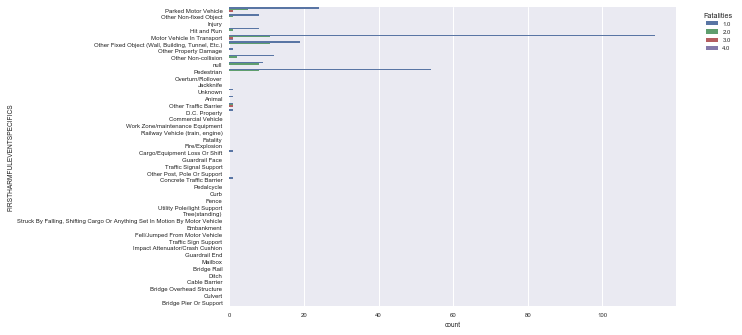

In [161]:
sns.set(font_scale=0.6)
#sns.set_context("talk") 
sns.countplot(y="FIRSTHARMFULEVENTSPECIFICS", hue="FATALITIES", data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title="Fatalities")

In [162]:
pd.crosstab(data['FIRSTHARMFULEVENTSPECIFICS'], data['FATALITIES'], margins=True)

FATALITIES,1.0,2.0,3.0,4.0,All
FIRSTHARMFULEVENTSPECIFICS,,,,,
Animal,1,0,0,0,1
Cargo/Equipment Loss Or Shift,1,0,0,0,1
Concrete Traffic Barrier,1,0,0,0,1
D.C. Property,1,0,0,0,1
Hit and Run,8,1,0,0,9
Motor Vehicle In Transport,114,11,1,1,127
"Other Fixed Object (Wall, Building, Tunnel, Etc.)",19,11,0,0,30
Other Non-collision,12,2,0,0,14
Other Non-fixed Object,8,1,0,0,9


### Light Condition

From the chart and table below, we see that fatal accidents are usually occuring during the daylight or at dark with streetlights.

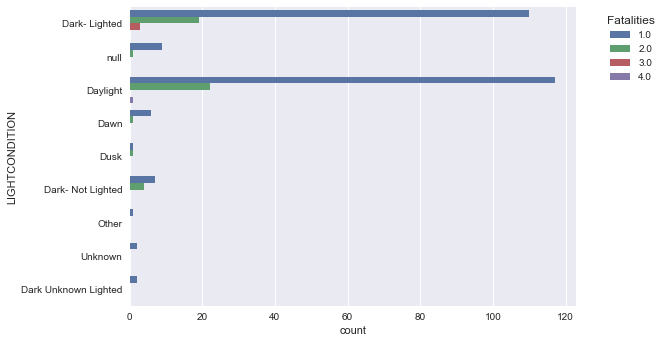

In [163]:
sns.set(font_scale=1)
sns.countplot(y="LIGHTCONDITION", hue="FATALITIES", data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title="Fatalities")

In [164]:
pd.crosstab(data['LIGHTCONDITION'], data['FATALITIES'], margins=True)

FATALITIES,1.0,2.0,3.0,4.0,All
LIGHTCONDITION,,,,,
Dark Unknown Lighted,2,0,0,0,2
Dark- Lighted,110,19,3,0,132
Dark- Not Lighted,7,4,0,0,11
Dawn,6,1,0,0,7
Daylight,117,22,0,1,140
Dusk,1,1,0,0,2
Other,1,0,0,0,1
Unknown,2,0,0,0,2
null,9,1,0,0,10


### Drinking and driving

Looking at the values of `ISDRINKING`, we can exclude the variable in our analysis seeing as almost all the fatalities have no data provided for them in regards to drinking status. 

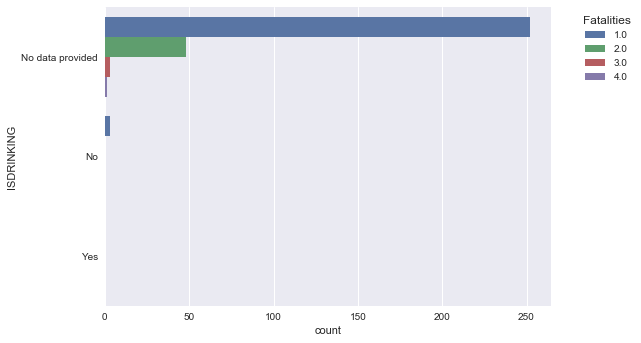

In [165]:
sns.countplot(y="ISDRINKING", hue="FATALITIES", data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title="Fatalities")

In [166]:
pd.crosstab(data['ISDRINKING'], data['FATALITIES'], margins=True)

FATALITIES,1.0,2.0,3.0,4.0,All
ISDRINKING,,,,,
No,3,0,0,0,3
No data provided,252,48,3,1,304
All,255,48,3,1,307


### Intersection Type

We should also exclude `INTERSECTIONTYPE` for similar reasons.

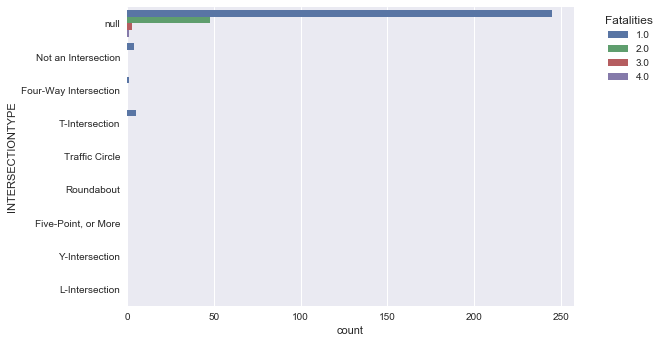

In [167]:
sns.countplot(y="INTERSECTIONTYPE", hue="FATALITIES", data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title="Fatalities")

In [168]:
pd.crosstab(data['INTERSECTIONTYPE'], data['FATALITIES'], margins=True)

FATALITIES,1.0,2.0,3.0,4.0,All
INTERSECTIONTYPE,,,,,
Four-Way Intersection,1,0,0,0,1
Not an Intersection,4,0,0,0,4
T-Intersection,5,0,0,0,5
null,245,48,3,1,297
All,255,48,3,1,307


### Weather

Most fatal crashes happened when weather was `Clear`. The next most frequent weather type is `Rain`, with 24 total fatalities.

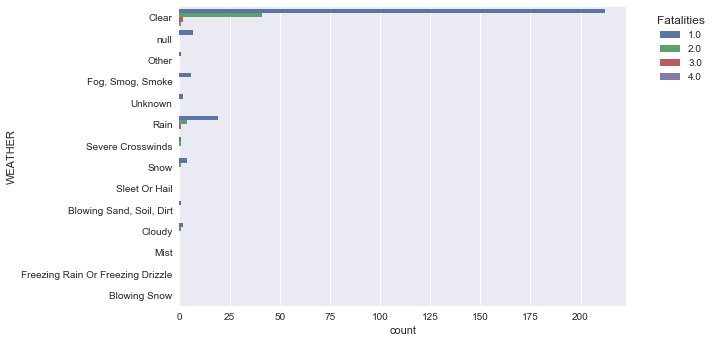

In [169]:
sns.countplot(y="WEATHER", hue="FATALITIES", data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title="Fatalities")

In [170]:
pd.crosstab(data['WEATHER'], data['FATALITIES'], margins=True)

FATALITIES,1.0,2.0,3.0,4.0,All
WEATHER,,,,,
"Blowing Sand, Soil, Dirt",1,0,0,0,1
Clear,212,41,2,1,256
Cloudy,2,1,0,0,3
"Fog, Smog, Smoke",6,0,0,0,6
Other,1,0,0,0,1
Rain,19,4,1,0,24
Severe Crosswinds,1,1,0,0,2
Snow,4,1,0,0,5
Unknown,2,0,0,0,2


# Data cleaning

The fields for cyclists involved, pedestrians involved, minor injuries, major injuries, and fatalities have lots of `NaN` values. We'll assume that these are crashes where there were 0 cyclists or pedestrians invovled, or 0 injuries and fatalities. We'll replace all the `NaN` values in these fields with 0 so we can conduct our analysis. Then, we'll convert them to `int` values for simplification.

In [171]:
#fill NaN data with 0 
data.CYCLISTSINVOLVED.fillna(0, inplace=True)
data.PEDESTRIANSINVOLVED.fillna(0, inplace=True)
data.MINORINJURIES.fillna(0, inplace=True)
data.MAJORINJURIES.fillna(0, inplace=True)
data.FATALITIES.fillna(0, inplace=True)

#convert floats to ints to simplify 
data.CYCLISTSINVOLVED = data.CYCLISTSINVOLVED.astype(int)
data.PEDESTRIANSINVOLVED = data.PEDESTRIANSINVOLVED.astype(int)
data.MINORINJURIES = data.MINORINJURIES.astype(int)
data.MAJORINJURIES = data.MAJORINJURIES.astype(int)
data.FATALITIES = data.FATALITIES.astype(int)

## Dummification 

This dataset contains several categorical variables that we need to turn into dummy variables. 

### First Harmful Event Specifics

In [172]:
#create dummy variables for FIRSTHARMFULEVENTSPECIFICS
event_dummies = pd.get_dummies(data.FIRSTHARMFULEVENTSPECIFICS, prefix='event')
event_dummies.head(1)

,event_Animal,event_Bridge Overhead Structure,event_Bridge Pier Or Support,event_Bridge Rail,event_Cable Barrier,event_Cargo/Equipment Loss Or Shift,event_Commercial Vehicle,event_Concrete Traffic Barrier,event_Culvert,event_Curb,...,event_Pedestrian,"event_Railway Vehicle (train, engine)","event_Struck By Falling, Shifting Cargo Or Anything Set In Motion By Motor Vehicle",event_Traffic Sign Support,event_Traffic Signal Support,event_Tree(standing),event_Unknown,event_Utility Pole/light Support,event_Work Zone/maintenance Equipment,event_null
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
#join the event dummy variables with the rest of the data, drop the first dummy 
data = data.join(event_dummies.loc[:, 'event_Bridge Overhead Structure':])

### Light Condition

In [174]:
light_dummies = pd.get_dummies(data.LIGHTCONDITION, prefix='light')
light_dummies.head(1)

,light_Dark Unknown Lighted,light_Dark- Lighted,light_Dark- Not Lighted,light_Dawn,light_Daylight,light_Dusk,light_Other,light_Unknown,light_null
0,0,1,0,0,0,0,0,0,0


In [175]:
data = data.join(light_dummies.loc[:, 'light_Dark- Lighted':])

### Weather

In [176]:
weather_dummies = pd.get_dummies(data.WEATHER, prefix='weather')
weather_dummies.head(1)

,"weather_Blowing Sand, Soil, Dirt",weather_Blowing Snow,weather_Clear,weather_Cloudy,"weather_Fog, Smog, Smoke",weather_Freezing Rain Or Freezing Drizzle,weather_Mist,weather_Other,weather_Rain,weather_Severe Crosswinds,weather_Sleet Or Hail,weather_Snow,weather_Unknown,weather_null
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [177]:
data = data.join(weather_dummies.loc[:, 'weather_Blowing Sand Soil, Dirt':])

### Take a look at the resulting dataset and clean it up some more

In [178]:
data.head(1)

,INTERSECTIONTYPE,ISWORKZONERELATED,FIRSTHARMFULEVENTSPECIFICS,LIGHTCONDITION,WEATHER,ISDRINKING,CYCLISTSINVOLVED,PEDESTRIANSINVOLVED,MINORINJURIES,MAJORINJURIES,...,"weather_Fog, Smog, Smoke",weather_Freezing Rain Or Freezing Drizzle,weather_Mist,weather_Other,weather_Rain,weather_Severe Crosswinds,weather_Sleet Or Hail,weather_Snow,weather_Unknown,weather_null
0,null,0,Parked Motor Vehicle,Dark- Lighted,Clear,No data provided,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
data.columns

Index(['INTERSECTIONTYPE', 'ISWORKZONERELATED', 'FIRSTHARMFULEVENTSPECIFICS',
       'LIGHTCONDITION', 'WEATHER', 'ISDRINKING', 'CYCLISTSINVOLVED',
       'PEDESTRIANSINVOLVED', 'MINORINJURIES', 'MAJORINJURIES', 'FATALITIES',
       'XCOORD', 'YCOORD', 'event_Bridge Overhead Structure',
       'event_Bridge Pier Or Support', 'event_Bridge Rail',
       'event_Cable Barrier', 'event_Cargo/Equipment Loss Or Shift',
       'event_Commercial Vehicle', 'event_Concrete Traffic Barrier',
       'event_Culvert', 'event_Curb', 'event_D.C. Property', 'event_Ditch',
       'event_Embankment', 'event_Fatality',
       'event_Fell/Jumped From Motor Vehicle', 'event_Fence',
       'event_Fire/Explosion', 'event_Guardrail End', 'event_Guardrail Face',
       'event_Hit and Run', 'event_Impact Attenuator/Crash Cushion',
       'event_Injury', 'event_Jackknife', 'event_Mailbox',
       'event_Motor Vehicle In Transport',
       'event_Other Fixed Object (Wall, Building, Tunnel, Etc.)',
       'event_Ot

In [180]:
#drop data that is null or unknown, drop non-dummied variables
data = data.drop(['FIRSTHARMFULEVENTSPECIFICS', 'ISDRINKING', 'INTERSECTIONTYPE', 'WEATHER', 'LIGHTCONDITION', 'event_Unknown', 'event_null', 'light_null', 'weather_null', 'weather_Other', 'weather_Unknown'], 1)

# Viewing correlation matrix

We're creating a heatmap of the entire dataset - the redder the squares, the higher the correlation between two fields. The bluer the squares, the lower the correlation between two fields. 

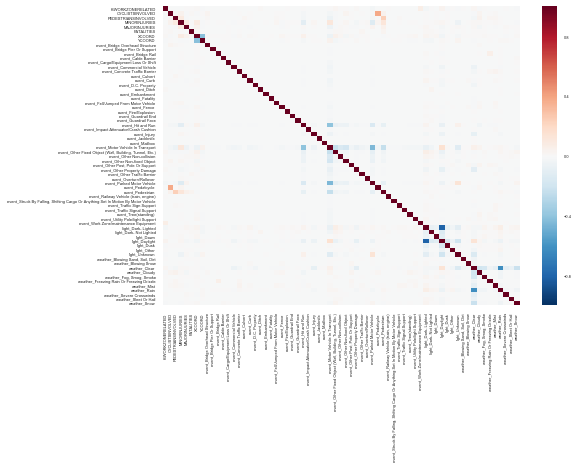

In [181]:
#set font scale to see all labels
sns.set(font_scale=0.4)
#create correlation matrix 
corr = data.corr()
#create heatmap of the correlation matrix
sns.heatmap(corr)

From the heatmap we can see that `event_Pedalcycle` and `PEDESTRIANSINVOLVED`, and `event_Pedestrian` and `PEDESTRIANSINVOLVED` have higher correlations, which makes sense. We can also see that `event_Motor Vehicle in Transport` has a lower correlation with `event_Hit and Run` and `event_Parked Motore Vehicle`.  `weather_Rain` and `weather_Clear` have a low correlation as well. 

## Calculate corelation coefficients

In [182]:
#turn FATALITIES into a categorical variable, where 0 = no fatalities and 1 = at least one fatality
def fatal (row):
    if row['FATALITIES'] == 0:
        return 0
    else:
        return 1
    
data['FATALITIES'] = data.apply(fatal, axis=1)
data.FATALITIES.value_counts()

0    152437
1       307
Name: FATALITIES, dtype: int64

In [183]:
#reorder the dataset - put XCOORD, YCOORD, and FATALITIES at the beginning of the dataframe 
XCOORD = data.XCOORD
YCOORD = data.YCOORD
FATALITIES = data.FATALITIES 
data.drop(labels=['XCOORD', 'YCOORD', 'FATALITIES'], axis=1, inplace=True)

data.insert(0, 'FATALITIES', FATALITIES)
data.insert(0, 'YCOORD', YCOORD)
data.insert(0, 'XCOORD', XCOORD)

#calculate correlation between all variables (except the coordinates) and FATALITIES 
fatalities_corrs = [data[data.columns[3:]].apply(lambda x: x.corr(data['FATALITIES']))]
pd.set_option('max_rows', 100)
fatalities_corrs

[ISWORKZONERELATED                                                                     0.002438
 CYCLISTSINVOLVED                                                                      0.011285
 PEDESTRIANSINVOLVED                                                                   0.000166
 MINORINJURIES                                                                         0.003319
 MAJORINJURIES                                                                        -0.005411
 event_Bridge Overhead Structure                                                      -0.000281
 event_Bridge Pier Or Support                                                         -0.000325
 event_Bridge Rail                                                                    -0.000445
 event_Cable Barrier                                                                  -0.000199
 event_Cargo/Equipment Loss Or Shift                                                   0.008561
 event_Commercial Vehicle               

From the above list, we can see that the calculated correlations between all variables and `FATALITIES` is very slight, with the only correlation being outside of -0.016 and 0.016 is `event_Pedestrian`, at 0.034. We might not have the right data for this analysis, but let's carry on.

# Creating a model 

To analyse the greatest predictors of fatal crashes, we'll create a logistic regression model. Our independent variables have been reduced to only include fields that had at least one occurence of a fatal crash, which have been detailed in the crosstab tables above. First, we split the data into train and test datasets.

In [184]:
import sklearn.linear_model as lm
from sklearn.cross_validation import train_test_split

model = lm.LogisticRegression()
features = ['FATALITIES', 'CYCLISTSINVOLVED', 'MAJORINJURIES', 'event_Cargo/Equipment Loss Or Shift', 'event_Hit and Run', 'event_Motor Vehicle In Transport', 'event_Other Non-collision', 'event_Other Traffic Barrier', 'event_Parked Motor Vehicle', 'event_Pedestrian', 'light_Daylight', 'light_Dusk', 'weather_Blowing Sand, Soil, Dirt', 'weather_Clear', 'weather_Cloudy', 'weather_Fog, Smog, Smoke', 'weather_Rain', 'weather_Severe Crosswinds', 'weather_Snow']

In [185]:
#split into training data
train_data, test_data = train_test_split(data, test_size = 0.4)
#use features list to train the data, with FATALITIES as target var
model.fit(train_data[features[1:]], train_data['FATALITIES'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Generate probability matrix

Now, we create a probability matrix. This adds a column, `probability`, and populates it with the probability of whether that particular crash will be fatal.

In [186]:
#generate probability matrix
test_data['probability'] = model.predict_proba(test_data[features[1:]]).T[1]

/Users/cour7816/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [187]:
features += ['probability']

# Visualize probability of different features

The following plots visualize the probability of different features being fatal. We can see that none of them shed much insight on whether a crash is going to be fatal or not.

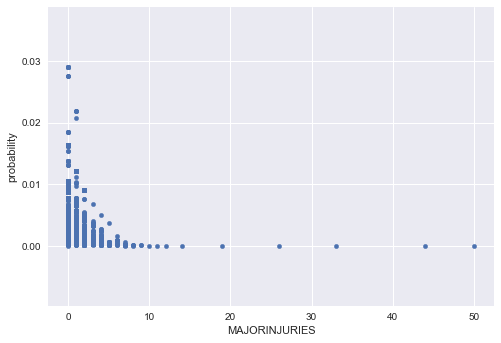

In [189]:
sns.set(font_scale=1)
ax = plt.subplot()

test_data.plot(x='MAJORINJURIES', y='probability', kind='scatter', ax=ax)

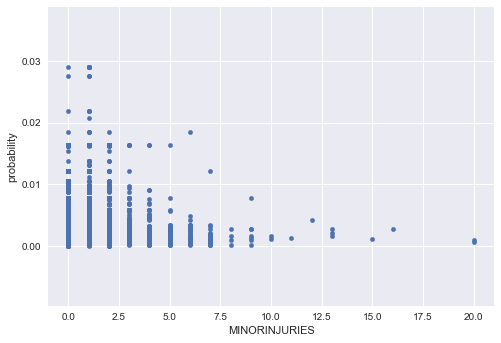

In [190]:
sns.set(font_scale=1)
ax = plt.subplot()

test_data.plot(x='MINORINJURIES', y='probability', kind='scatter', ax=ax)

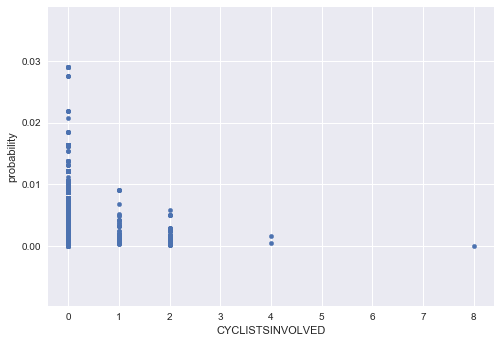

In [191]:
ax = plt.subplot(111)

test_data.plot(x='CYCLISTSINVOLVED', y='probability', kind='scatter', ax=ax)

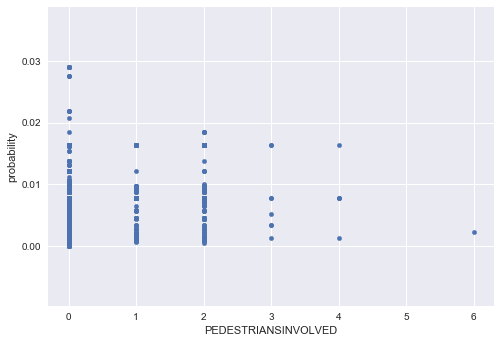

In [192]:
ax = plt.subplot(111)

test_data.plot(x='PEDESTRIANSINVOLVED', y='probability', kind='scatter', ax=ax)

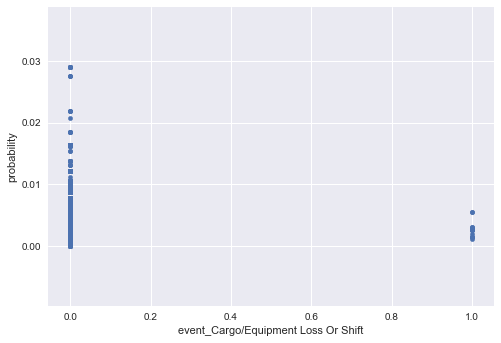

In [193]:
ax = plt.subplot(111)

test_data.plot(x='event_Cargo/Equipment Loss Or Shift', y='probability', kind='scatter', ax=ax)

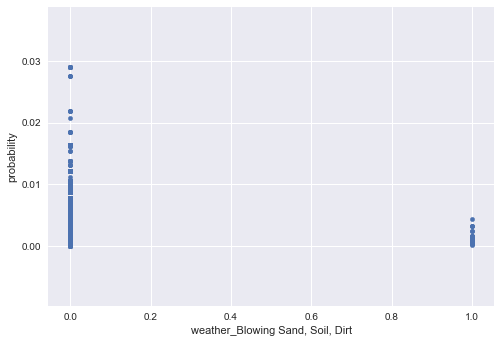

In [194]:
ax = plt.subplot(111)

test_data.plot(x='weather_Blowing Sand, Soil, Dirt', y='probability', kind='scatter', ax=ax)

# Visualize performance against baseline

Now, we'll visualize the AUC and calculate the ROC. Our ROC score is 0.70, which is fair. There is definitely room for improvement.

In [195]:
from sklearn import dummy, metrics 

In [196]:
del features[-1]
model0 = dummy.DummyClassifier()
model0.fit(train_data[features[1:]], train_data['FATALITIES'])
test_data['probability_0'] = model0.predict_proba(test_data[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model.fit(train_data[features[1:]], train_data['FATALITIES'])
test_data['probability_1'] = model.predict_proba(test_data[features[1:]]).T[1]
                                                                  
                                            

/Users/cour7816/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/cour7816/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


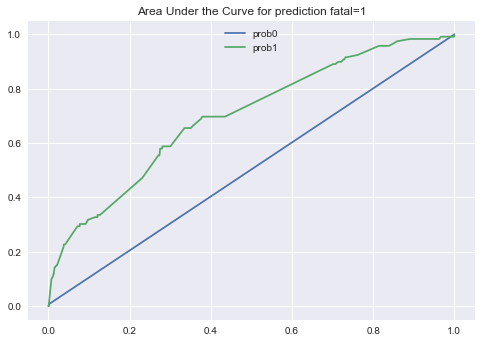

In [197]:
ax = plt.subplot(111)
vals = metrics.roc_curve(test_data.FATALITIES, test_data.probability_0)
ax.plot(vals[0], vals[1], label='prob0')
vals = metrics.roc_curve(test_data.FATALITIES, test_data.probability_1)
ax.plot(vals[0], vals[1], label='prob1')

ax.set(title='Area Under the Curve for prediction fatal=1', ylabel='', xlabel='')
legend = ax.legend(loc='upper center')

In [202]:
metrics.roc_auc_score(test_data.FATALITIES, test_data.probability_1)

0.69885010695926308

# Next Steps

From the weak correlations, probabilities, and area under the ROC curve score, it is clear that we can't make any solid conclusions from this analysis and there is room for improvement. Other data that could augment this study include, but are not limited to:
* traffic data
* location (x and y coordinates) 
* age of driver
* type of vehicle 

With more data, we could see an improved analysis and come to a supported conclusion as to what factors contribute the most to fatal car crashes. 